# Analyzing NYC's Stormwater Flood Map - Extreme Flood Scenario
## Objective: Retrieve Hourly and Daily Precipitaton Data

Mark Bauer

In [22]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['savefig.facecolor'] = 'white'
%matplotlib inline

In [23]:
%reload_ext watermark
%watermark -v -p numpy,pandas,seaborn,matplotlib,geopandas

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

numpy     : 1.22.4
pandas    : 1.4.2
seaborn   : 0.11.2
matplotlib: 3.5.2
geopandas : 0.9.0



# Hourly Precipitation Data

##  ASOS Data Download from Iowa Environmental Mesonet (IEM)

Source: https://mesonet.agron.iastate.edu/request/download.phtml?network=NY_ASOS#

In [24]:
# url of data, this was performed manually by me
url = 'https://mesonet.agron.iastate.edu/cgi-bin/request/asos.py?\
station=NYC&data=p01m&year1=1928&month1=1&day1=1&year2=2023&month2=10&day2=9&tz=Etc%2FUTC\
&format=onlycomma&latlon=yes&elev=no&missing=empty&trace=null&direct=no&report_type=3'

df = pd.read_csv(url)
print('shape of data: {}'.format(df.shape))

# preview data
df.head()

shape of data: (309041, 5)


,station,valid,lon,lat,p01m
0,NYC,1943-12-01 05:00,-73.9693,40.779,NaN
1,NYC,1943-12-01 06:00,-73.9693,40.779,NaN
2,NYC,1943-12-01 07:00,-73.9693,40.779,NaN
3,NYC,1943-12-01 08:00,-73.9693,40.779,NaN
4,NYC,1943-12-01 09:00,-73.9693,40.779,NaN


In [28]:
# review column nulls and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309041 entries, 0 to 309040
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   station   309041 non-null  object        
 1   valid     309041 non-null  object        
 2   lon       309041 non-null  float64       
 3   lat       309041 non-null  float64       
 4   p01m      112502 non-null  float64       
 5   datetime  309041 non-null  datetime64[ns]
 6   p01inch   112502 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 16.5+ MB


In [29]:
## to datetime
df['datetime'] = pd.to_datetime(df['valid'])
print('new hourly dtype: {}'.format(df['datetime'].dtype))

## mm to inches
df['p01inch'] = round(df['p01m'] / 25.4, 4)

# preview data
df.head()

new hourly dtype: datetime64[ns]


,station,valid,lon,lat,p01m,datetime,p01inch
0,NYC,1943-12-01 05:00,-73.9693,40.779,NaN,1943-12-01 05:00:00,NaN
1,NYC,1943-12-01 06:00,-73.9693,40.779,NaN,1943-12-01 06:00:00,NaN
2,NYC,1943-12-01 07:00,-73.9693,40.779,NaN,1943-12-01 07:00:00,NaN
3,NYC,1943-12-01 08:00,-73.9693,40.779,NaN,1943-12-01 08:00:00,NaN
4,NYC,1943-12-01 09:00,-73.9693,40.779,NaN,1943-12-01 09:00:00,NaN


In [31]:
# review column nulls and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309041 entries, 0 to 309040
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   station   309041 non-null  object        
 1   valid     309041 non-null  object        
 2   lon       309041 non-null  float64       
 3   lat       309041 non-null  float64       
 4   p01m      112502 non-null  float64       
 5   datetime  309041 non-null  datetime64[ns]
 6   p01inch   112502 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 16.5+ MB


In [32]:
# review summary statistics
df.describe()

,lon,lat,p01m,p01inch
count,3.090410e+05,309041.000,112502.000000,112502.000000
mean,-7.396930e+01,40.779,0.349552,0.013760
std,2.842176e-14,0.000,1.499465,0.059034
min,-7.396930e+01,40.779,0.000000,0.000000
25%,-7.396930e+01,40.779,0.000000,0.000000
50%,-7.396930e+01,40.779,0.000000,0.000000
75%,-7.396930e+01,40.779,0.000000,0.000000
max,-7.396930e+01,40.779,80.010000,3.150000


In [33]:
# identify first non-null value by datetime
(df
 .sort_values(by='valid')
 .loc[df['p01m'].notnull()]
)

,station,valid,lon,lat,p01m,datetime,p01inch
5121,NYC,1965-01-02 18:00,-73.9693,40.779,0.51,1965-01-02 18:00:00,0.0201
5122,NYC,1965-01-02 21:00,-73.9693,40.779,1.27,1965-01-02 21:00:00,0.0500
5123,NYC,1965-01-03 00:00,-73.9693,40.779,1.27,1965-01-03 00:00:00,0.0500
5126,NYC,1965-01-03 09:00,-73.9693,40.779,0.25,1965-01-03 09:00:00,0.0098
5167,NYC,1965-01-08 12:00,-73.9693,40.779,2.03,1965-01-08 12:00:00,0.0799
...,...,...,...,...,...,...,...
309036,NYC,2023-10-08 19:51,-73.9693,40.779,0.00,2023-10-08 19:51:00,0.0000
309037,NYC,2023-10-08 20:51,-73.9693,40.779,0.00,2023-10-08 20:51:00,0.0000
309038,NYC,2023-10-08 21:51,-73.9693,40.779,0.00,2023-10-08 21:51:00,0.0000
309039,NYC,2023-10-08 22:51,-73.9693,40.779,0.00,2023-10-08 22:51:00,0.0000


In [34]:
# retrieving data starting at first observation that's non-null
start = (
    df
    .sort_values(by='valid')
    .loc[df['p01m'].notnull()]
    .head(1)
    .index[0]
)

df = (
    df
    .iloc[start:]
    .reset_index(drop=True)
)

print('shape of data: {}'.format(df.shape))
df.head()

shape of data: (303920, 7)


,station,valid,lon,lat,p01m,datetime,p01inch
0,NYC,1965-01-02 18:00,-73.9693,40.779,0.51,1965-01-02 18:00:00,0.0201
1,NYC,1965-01-02 21:00,-73.9693,40.779,1.27,1965-01-02 21:00:00,0.0500
2,NYC,1965-01-03 00:00,-73.9693,40.779,1.27,1965-01-03 00:00:00,0.0500
3,NYC,1965-01-03 03:00,-73.9693,40.779,NaN,1965-01-03 03:00:00,NaN
4,NYC,1965-01-03 06:00,-73.9693,40.779,NaN,1965-01-03 06:00:00,NaN


In [35]:
print('datetime bounds:\n')
print('date min: {}'.format(df['datetime'].min()))
print('date max: {}'.format(df['datetime'].max()))

datetime bounds:

date min: 1965-01-02 18:00:00
date max: 2023-10-08 23:51:00


In [36]:
# dataframe of hourly precipitation >= 1.75
df.loc[df['p01inch'] >= 1.75]

,station,valid,lon,lat,p01m,datetime,p01inch
138032,NYC,2004-09-08 11:51,-73.9693,40.779,44.70,2004-09-08 11:51:00,1.7598
285345,NYC,2021-08-22 03:51,-73.9693,40.779,49.28,2021-08-22 03:51:00,1.9402
285607,NYC,2021-09-02 01:51,-73.9693,40.779,80.01,2021-09-02 01:51:00,3.1500
303694,NYC,2023-09-29 13:51,-73.9693,40.779,49.78,2023-09-29 13:51:00,1.9598


In [37]:
counts = len(df.loc[df['p01inch'] >= 1.75])

print('Number of hourly observations with >= 1.75 inches of precipitation: {}'.format(counts))

Number of hourly observations with >= 1.75 inches of precipitation: 4


In [38]:
# records in print view
records = (
    df
    .loc[df['p01inch'] >= 1.75, ['valid', 'p01inch']]
    .rename(columns={'valid':'date', 'p01inch':'inches'})
    .sort_values(by='inches', ascending=False)
    .set_index('date')
)

print(records)

                  inches
date                    
2021-09-02 01:51  3.1500
2023-09-29 13:51  1.9598
2021-08-22 03:51  1.9402
2004-09-08 11:51  1.7598


In [39]:
# top 20 hourly precipitation events
records = (
    df
    .loc[:, ['valid', 'p01inch']]
    .rename(columns={'valid':'date', 'p01inch':'inches'})
    .sort_values(by='inches', ascending=False)
    .set_index('date')
    .head(20)
)

print(records)

                  inches
date                    
2021-09-02 01:51  3.1500
2023-09-29 13:51  1.9598
2021-08-22 03:51  1.9402
2004-09-08 11:51  1.7598
2005-08-14 23:51  1.7000
2007-08-08 10:51  1.7000
2018-08-11 12:51  1.6598
2020-08-12 20:51  1.6299
1967-07-03 09:00  1.5799
2006-08-10 23:51  1.5701
2021-07-08 21:51  1.5598
1973-08-02 15:00  1.5098
2021-09-02 02:51  1.5000
2010-10-01 09:51  1.4799
2009-01-17 16:51  1.4299
2009-01-17 23:51  1.4098
2021-08-22 02:51  1.3799
2021-07-12 06:51  1.3500
2022-12-23 09:51  1.3299
2009-01-17 21:51  1.3299


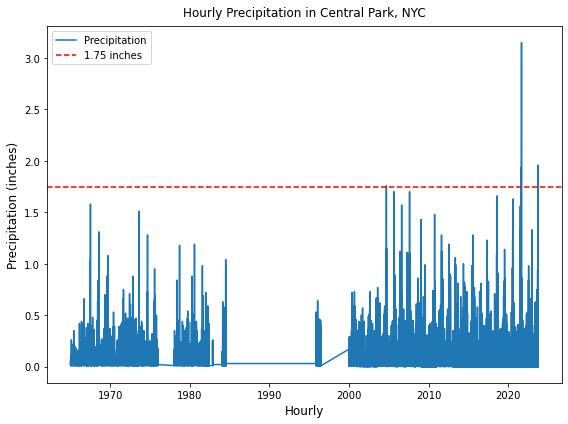

In [40]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.lineplot(
    x=df['datetime'],
    y=df['p01inch'],
    label='Precipitation'
)

plt.title(
    'Hourly Precipitation in Central Park, NYC', 
    fontsize=12,
    pad=10
)

plt.axhline(y=1.75, color='r',linestyle='--', label='1.75 inches')

plt.legend(loc=2)
plt.xlabel('Hourly', fontsize=12)
plt.ylabel('Precipitation (inches)', fontsize=12)
plt.tight_layout()

The figure above looks a bit weird with big chunks of missing data. This is only to demonstrate the distribution of values and extreme values.

# Daily Precipitation Data

## NCEI Climate Data Online's Daily Summaries, NY CITY CENTRAL PARK, NY US

Source: https://www.ncei.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00094728/detail

In [16]:
# download of data was performed manually by me
df = pd.read_csv('data/daily-precipitation.csv')

## to datetime
df['datetime'] = pd.to_datetime(df['DATE'])
print('new dtype: {}'.format(df['datetime'].dtype))

# preview data
print(df.shape)
df.head()

new dtype: datetime64[ns]
(56498, 9)


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,datetime
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,1869-01-01,0.75,",,Z,",1869-01-01
1,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,1869-01-02,0.03,",,Z,null",1869-01-02
2,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,1869-01-03,0.00,"T,,Z,null",1869-01-03
3,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,1869-01-04,0.18,",,Z,null",1869-01-04
4,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,1869-01-05,0.05,",,Z,null",1869-01-05


## The number of days with extreme rainfall
*Defined as days of rainfall over 1.75 inches in Central Park*

In [17]:
counts = len(df.loc[df['PRCP'] >= 1.75])

print('Total number of daily observations with >= 1.75 inches of precipitation: {}'.format(counts))

Total number of daily observations with >= 1.75 inches of precipitation: 543


In [18]:
# top 20 daily precipitation events
records = (
    df
    .loc[:, ['datetime', 'PRCP']]
    .rename(columns={'datetime':'date', 'PRCP':'inches'})
    .sort_values(by='inches', ascending=False)
    .set_index('date')
    .head(20)
)

print(records)

            inches
date              
1882-09-23    8.28
2007-04-15    7.57
1977-11-08    7.40
1903-10-09    7.33
2021-09-01    7.13
2011-08-14    5.81
1972-11-08    5.60
1966-09-21    5.54
1999-09-16    5.02
1913-10-01    4.98
2014-04-30    4.97
1934-09-08    4.86
1873-08-20    4.80
1909-08-16    4.80
1990-08-10    4.64
2021-08-21    4.45
1996-10-19    4.35
1983-04-10    4.31
1894-09-19    4.30
1903-10-08    4.30


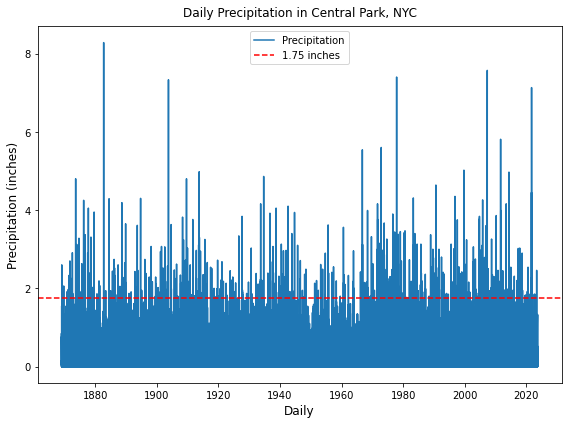

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.lineplot(
    x=df.set_index('datetime').index,
    y=df['PRCP'],
    label='Precipitation'
)

plt.title(
    'Daily Precipitation in Central Park, NYC', 
    fontsize=12,
    pad=10
)

plt.axhline(y=1.75, color='r', linestyle='--', label='1.75 inches')

plt.legend(loc='upper center')
plt.xlabel('Daily', fontsize=12)
plt.ylabel('Precipitation (inches)', fontsize=12)
plt.tight_layout()

In [20]:
# assign flag to extreme days
df.loc[df['PRCP'] >= 1.75, ['threshold']] = 1

# count days and bin data by decade
bins = [x for x in range(1860, 2040, 10)]
df['bins'] = pd.cut(df['datetime'].dt.year, bins=bins)

data = (
    df
    .groupby(by='bins')['threshold']
    .sum()
    .astype(int)
    .rename('count')
    .reset_index()
)

# clipping incomplete decades, remove from plot
data = data.iloc[1:-1, :]
data

,bins,count
1,"(1870, 1880]",33
2,"(1880, 1890]",30
3,"(1890, 1900]",26
4,"(1900, 1910]",41
5,"(1910, 1920]",36
6,"(1920, 1930]",27
7,"(1930, 1940]",32
8,"(1940, 1950]",21
9,"(1950, 1960]",22
10,"(1960, 1970]",25


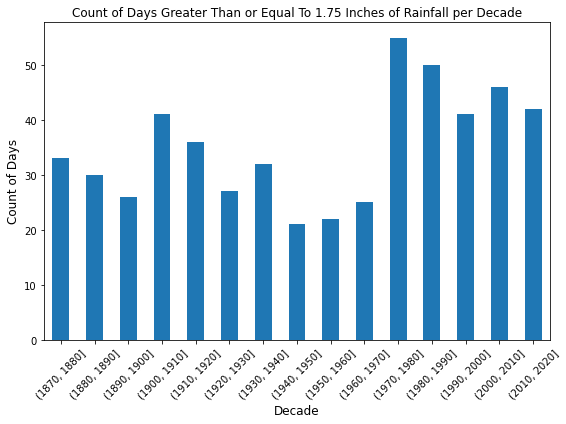

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))

data.plot.bar(
    x='bins',
    y='count',
    rot=45,
    legend=None,
    ax=ax 
)

plt.title('Count of Days Greater Than or Equal To 1.75 Inches of Rainfall per Decade', fontsize=12)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Count of Days', fontsize=12)
plt.tight_layout()